In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def count_concordant_and_discordant_links(links):
    links['score'] = links['log2FoldChange_peak']*links['log2FoldChange_gene']
    counts_concordant, counts_discordant = [], []
    for distance in [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]:
        count_c = len(links[(links['distance'] < distance) & (links['score'] > 0)])
        count_d = len(links[(links['distance'] < distance) & (links['score'] < 0)])
        counts_concordant.append(count_c)
        counts_discordant.append(count_d)
    return([counts_concordant, counts_discordant])

In [3]:
concordant_discordant_counts = pd.DataFrame()
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    links_allele_specific = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/links/links_{sample}_allele_specific.txt', sep = '\t', header = 0)
    links_balanced = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/links/links_{sample}_balanced.txt', sep = '\t', header = 0)
    as_concordant, as_discordant = count_concordant_and_discordant_links(links_allele_specific)
    balanced_concordant, balanced_discordant = count_concordant_and_discordant_links(links_balanced)
    
    concordant_discordant_counts[f'{sample}_as_concordant'] = as_concordant
    concordant_discordant_counts[f'{sample}_as_discordant'] = as_discordant
    concordant_discordant_counts[f'{sample}_balanced_concordant'] = balanced_concordant
    concordant_discordant_counts[f'{sample}_balanced_discordant'] = balanced_discordant
    
concordant_discordant_counts

,NA12878_as_concordant,NA12878_as_discordant,NA12878_balanced_concordant,NA12878_balanced_discordant,NA18983_as_concordant,NA18983_as_discordant,NA18983_balanced_concordant,NA18983_balanced_discordant,HG01241_as_concordant,HG01241_as_discordant,HG01241_balanced_concordant,HG01241_balanced_discordant,HG02601_as_concordant,HG02601_as_discordant,HG02601_balanced_concordant,HG02601_balanced_discordant,HG03464_as_concordant,HG03464_as_discordant,HG03464_balanced_concordant,HG03464_balanced_discordant
0,40,2,2383,2119,20,1,2136,1946,21,1,3077,2778,30,4,2320,2165,94,2,3374,3024
1,42,3,2662,2359,27,1,2398,2155,28,1,3360,3038,32,4,2579,2362,104,2,3718,3321
2,48,4,3163,2846,31,2,2885,2586,37,4,3903,3518,35,4,3006,2768,117,5,4462,3957
3,55,4,4067,3669,38,4,3771,3423,43,6,4911,4472,48,6,3788,3480,143,9,5836,5205
4,66,6,5734,5224,46,6,5472,4946,52,6,6878,6360,60,6,5270,4873,180,20,8441,7611
5,93,13,10413,9376,83,10,10015,9303,83,11,12417,11876,85,9,9497,8758,251,45,16006,14644
6,115,24,17049,16077,110,17,16827,15919,106,18,21188,20311,109,12,15747,14951,302,89,27645,25898
7,146,42,29026,28059,158,33,28867,27841,137,41,36724,35578,149,26,26848,26060,388,155,48525,46584
8,206,81,60213,58836,235,105,59598,58181,193,85,77258,76181,203,67,55801,54633,573,333,103317,101112
9,285,155,104999,103923,359,213,104450,102459,268,160,136934,135060,270,123,96852,95694,814,583,183310,180714


In [4]:
concordant_discordant_counts['total_as_concordant'] = concordant_discordant_counts['NA12878_as_concordant']+concordant_discordant_counts['NA18983_as_concordant']+concordant_discordant_counts['HG01241_as_concordant']+concordant_discordant_counts['HG02601_as_concordant']+concordant_discordant_counts['HG03464_as_concordant']
concordant_discordant_counts['total_as_discordant'] = concordant_discordant_counts['NA12878_as_discordant']+concordant_discordant_counts['NA18983_as_discordant']+concordant_discordant_counts['HG01241_as_discordant']+concordant_discordant_counts['HG02601_as_discordant']+concordant_discordant_counts['HG03464_as_discordant']
concordant_discordant_counts['total_balanced_concordant'] = concordant_discordant_counts['NA12878_balanced_concordant']+concordant_discordant_counts['NA18983_balanced_concordant']+concordant_discordant_counts['HG01241_balanced_concordant']+concordant_discordant_counts['HG02601_balanced_concordant']+concordant_discordant_counts['HG03464_balanced_concordant']
concordant_discordant_counts['total_balanced_discordant'] = concordant_discordant_counts['NA12878_balanced_discordant']+concordant_discordant_counts['NA18983_balanced_discordant']+concordant_discordant_counts['HG01241_balanced_discordant']+concordant_discordant_counts['HG02601_balanced_discordant']+concordant_discordant_counts['HG03464_balanced_discordant']

concordant_discordant_counts

,NA12878_as_concordant,NA12878_as_discordant,NA12878_balanced_concordant,NA12878_balanced_discordant,NA18983_as_concordant,NA18983_as_discordant,NA18983_balanced_concordant,NA18983_balanced_discordant,HG01241_as_concordant,HG01241_as_discordant,...,HG02601_balanced_concordant,HG02601_balanced_discordant,HG03464_as_concordant,HG03464_as_discordant,HG03464_balanced_concordant,HG03464_balanced_discordant,total_as_concordant,total_as_discordant,total_balanced_concordant,total_balanced_discordant
0,40,2,2383,2119,20,1,2136,1946,21,1,...,2320,2165,94,2,3374,3024,205,10,13290,12032
1,42,3,2662,2359,27,1,2398,2155,28,1,...,2579,2362,104,2,3718,3321,233,11,14717,13235
2,48,4,3163,2846,31,2,2885,2586,37,4,...,3006,2768,117,5,4462,3957,268,19,17419,15675
3,55,4,4067,3669,38,4,3771,3423,43,6,...,3788,3480,143,9,5836,5205,327,29,22373,20249
4,66,6,5734,5224,46,6,5472,4946,52,6,...,5270,4873,180,20,8441,7611,404,44,31795,29014
5,93,13,10413,9376,83,10,10015,9303,83,11,...,9497,8758,251,45,16006,14644,595,88,58348,53957
6,115,24,17049,16077,110,17,16827,15919,106,18,...,15747,14951,302,89,27645,25898,742,160,98456,93156
7,146,42,29026,28059,158,33,28867,27841,137,41,...,26848,26060,388,155,48525,46584,978,297,169990,164122
8,206,81,60213,58836,235,105,59598,58181,193,85,...,55801,54633,573,333,103317,101112,1410,671,356187,348943
9,285,155,104999,103923,359,213,104450,102459,268,160,...,96852,95694,814,583,183310,180714,1996,1234,626545,617850


In [5]:
distances = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    for i, conc, disc in zip(np.arange(len(concordant_discordant_counts)), concordant_discordant_counts[sample + '_as_concordant'], concordant_discordant_counts[sample + '_as_discordant']):
        if distances[i] in [50000, 1000000]:
            print(distances[i], conc/(conc+disc)*100, conc, disc)

50000 87.73584905660378 93 13
1000000 64.77272727272727 285 155
50000 89.24731182795699 83 10
1000000 62.76223776223776 359 213
50000 88.29787234042553 83 11
1000000 62.616822429906534 268 160
50000 90.42553191489363 85 9
1000000 68.70229007633588 270 123
50000 84.7972972972973 251 45
1000000 58.26771653543307 814 583


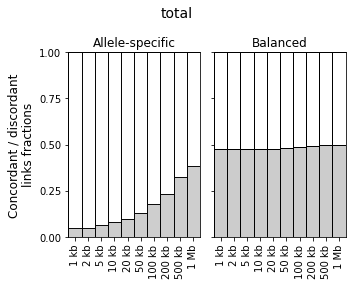

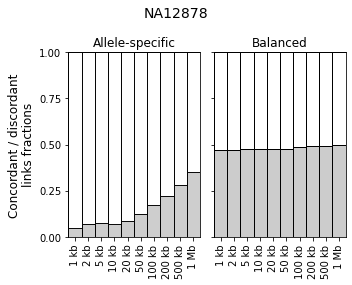

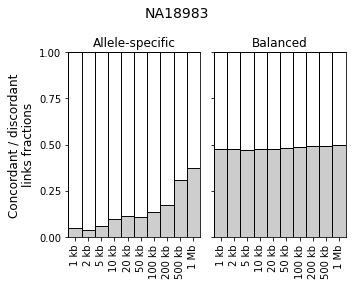

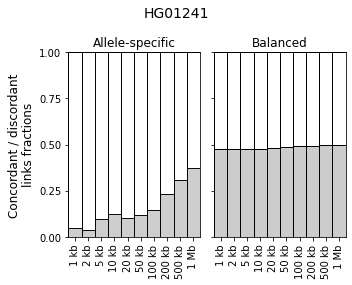

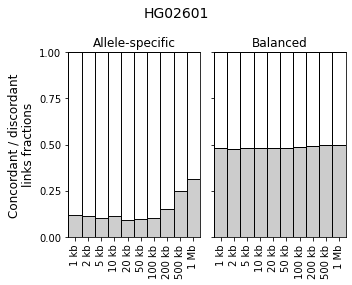

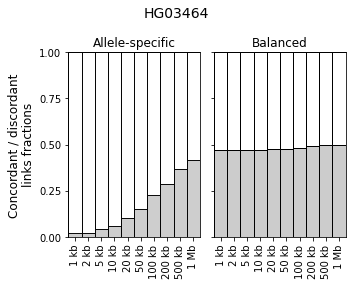

In [6]:
for sample in ['total', 'NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    plt.figure(figsize = (5, 4))
    plt.suptitle(sample, fontsize = 14)
    
    plt.subplot(121)
    plt.title('Allele-specific', fontsize = 12)
    for i, conc, disc in zip(np.arange(len(concordant_discordant_counts)), concordant_discordant_counts[sample + '_as_concordant'], concordant_discordant_counts[sample + '_as_discordant']):
        plt.bar([i, i], [1, 1-conc/(conc+disc)], color = ['w', '#CCCCCC'], edgecolor = 'k', width = 1, alpha = 0.95)
    plt.xticks(np.arange(len(concordant_discordant_counts)), 
               ['1 kb', '2 kb', '5 kb', '10 kb', '20 kb', '50 kb', '100 kb', '200 kb', '500 kb', '1 Mb'], rotation = 90)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.xlim((-0.5, 9.5))
    plt.ylim((0, 1))
    plt.ylabel('Concordant / discordant\nlinks fractions', fontsize = 12)

    plt.subplot(122)
    plt.title('Balanced', fontsize = 12)
    for i, conc, disc in zip(np.arange(len(concordant_discordant_counts)), concordant_discordant_counts[sample + '_balanced_concordant'], concordant_discordant_counts[sample + '_balanced_discordant']):
        plt.bar([i, i], [1, 1-conc/(conc+disc)], color = ['w', '#CCCCCC'], edgecolor = 'k', width = 1)
    plt.xticks(np.arange(len(concordant_discordant_counts)), 
               ['1 kb', '2 kb', '5 kb', '10 kb', '20 kb', '50 kb', '100 kb', '200 kb', '500 kb', '1 Mb'], rotation = 90)
    plt.yticks([0, 0.25, 0.5, 0.75, 1], [])
    plt.xlim((-0.5, 9.5))
    plt.ylim((0, 1))

    plt.tight_layout()
    plt.savefig(f'/DATA/users/m.magnitov/hap_phen/figures/links_concordance_{sample}.pdf', bbox_inches = 'tight')
    plt.show()